# Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-matplotlib-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Couple of reference site:
<ul>
<li/>http://matplotlib.org/examples/pylab_examples/
<li/>http://docs.scipy.org/doc/numpy/
</ul>



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

#### Homework 4.1

4.1.a Create a figure with two subplots in a row.
One shows a sine wave of x from with x = 0 ... 2*pi the other shows the tagent of x with the same range.
Label the figures.

Should look something like:
<img src="./images/Figure_with_multipleplot.png" width="300" height="200">



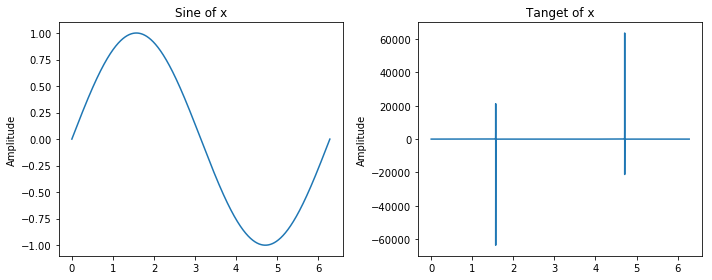

In [3]:
x = np.linspace(0,2*np.pi,100000)
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.plot(x, np.sin(x))
ax1.grid(False)
ax1.set_ylabel('Amplitude')
ax1.set_title('Sine of x')

ax2 = fig.add_subplot(122)
ax2.plot(x, np.tan(x))
ax2.grid(False)
ax2.set_ylabel('Amplitude')
ax2.set_title('Tanget of x')

plt.tight_layout()


#### Homework 4.2
 

Make a combined plot of a  red spiral with a scatter plot.

The red spiral has r from 0 to 3 with steps of 0.1 and
a theta of 2 * pi * r.

The scatter uses the same theta as the spiral but the radius r is offset by a random value ranging from -.5 to .5.
The size of the plotted locations is 100 * r^2 and the color uses theta.

Use an alpha value of .4 for the colors in the scatter plot.
Limit the size of the plot (rmax) to 2.5
 
 Should look something like:
<img src="./images/lineplot_with_scatterplot.png" width="300" height="200">


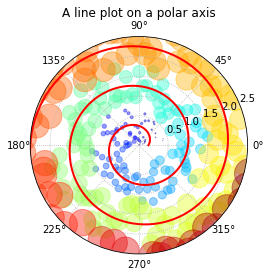

In [17]:
r = np.arange(0, 3, 0.01)

theta = 2*np.pi*r
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='r', linewidth=2)

ax.set_rticks([0.5,1.0,1.5,2.0,2.5])
ax.grid(ls='dotted')               # Use a dotted grid line
ax.set_title("A line plot on a polar axis", va='bottom')

area = 100*r**2
colors = theta

r1 = [r + (np.random.random(300,) - 0.5)]   # Have to take 100 random numbers to match the number of values in r
#r1 = r + np.random.uniform(-0.5, 0.5)
ax.scatter(theta, r1, c=colors, s=area, cmap=plt.cm.jet, alpha=0.4)   #The alpha is a paremeter for transparency (0 (transparent) and 1 (opaque)
ax.set_rmax(2.5)

#### Homework 4.3
Create a 2d histogram of 100000 points

x is a generated from a normal random distribution 

y is generated from a geometric random value witha p=.01 
Use the LogNorm color settings for hist2d.
And show the colorbar as well.

Should look something like:
<img src="./images/2d_histogram.png" width="300" height="200">


### 2-D Histogram

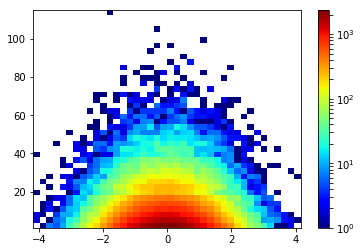

In [60]:
from matplotlib import colors
from matplotlib.colors import LogNorm
from pylab import *

x = np.random.standard_normal(100000)        # Draw 100000 values from a standard normal distribution (mean=0, stdev=1)
y = np.random.geometric(p=0.1, size=100000)  # Draw 100000 values from the geometric distribution, with the probability equal to 0.1

plt.hist2d(x, y, bins=40, norm=LogNorm(), cmap=plt.cm.jet) # 2-D histogram
colorbar()


#### Homework 4.4
Show the same data in homewowrk 4.3 in a 3d plot.
Use a numpy.histrogram2d funtion to generate the data:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

Need to use statements:

<em>from mpl_toolkits.mplot3d import Axes<br/>
fig = plt.figure()<br/>
ax = fig.gca(projection='3d')</em>

...

ax.plot_surface(xm,ym,hist,rstride=1,cstride=1,cmap=plt.cm.jet)

</em>

Should look something like:
<img src="./images/3dplot.png" width="300" height="200">


### Surface Plot

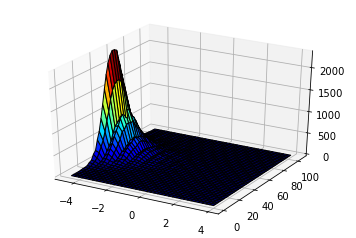

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.random.standard_normal(100000)
y = np.random.geometric(p=0.1, size=100000)

# xedges and yedges are the bin edges along the 2 dimensions.
# The bi-dimensional histogram of samples x and y. Values in x and y are histogrammed along the two dimensions
hist, xedges, yedges = np.histogram2d(x, y, bins=40)     # Takes an array containing the x and y coordinates  of the points

# The xedges and yedges from "np.histogram2d" have their shape different (with one extra value). So, while creating coordinate 
# arrays, we have to remove the last value.
xm, ym = np.meshgrid(xedges[:-1], yedges[:-1])  # The meshgrid function is useful for creating coordinate arrays to 
                                                # vectorize function evaluations over a grid 

ax.plot_surface(xm, ym, hist, rstride=1, cstride=1, edgecolor='black', cmap=plt.cm.jet) 